# ML - Data Analysis Report (Regression part)

## Step 0: Data  Preparation

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import gc
import time
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import precision_recall_curve, auc, roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
warnings.filterwarnings('ignore')
os.getcwd()

'/Users/yuhan/Downloads/UMN/Fall 2020/CSCI 5523 Introduction to Data Mining/Final Project'

In [2]:
#import the raw data
df = pd.read_csv("DREAM_data_T.csv", index_col=0)
df.shape
#标签
label1 = df.iloc[:, 0]
label2 = df.iloc[:, 1]
label3 = df.iloc[:, 2]
label4 = df.iloc[:, 3]
label5 = df.iloc[:, 4]
#feature
data = df.iloc[:, 5:]

#Everolimus(mTOR)
data1 = pd.concat([data, label1], axis=1)
data1 = data1[data1['Everolimus(mTOR)'].notnull()] # remove null

data2 = pd.concat([data, label2], axis=1)
data2 = data2[data2['Disulfiram(ALDH2)'].notnull()] # remove null

data3 = pd.concat([data, label3], axis=1)
data3 = data3[data3['Methylglyoxol(Pyruvate)'].notnull()] # remove null

data4 = pd.concat([data, label4], axis=1)
data4 = data4[data4['Mebendazole(Tubulin)'].notnull()] # remove null

data5 = pd.concat([data, label5], axis=1)
data5 = data5[data5['4-HC(DNA alkylator)'].notnull()] # remove null

from sklearn.model_selection import train_test_split
X_train_0, X_test_0, y_train_0, y_test_0 = train_test_split(data1[data.columns], data1['Everolimus(mTOR)'], test_size=0.2, random_state=1)
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(data2[data.columns], data2['Disulfiram(ALDH2)'], test_size=0.2, random_state=1)
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(data3[data.columns], data3['Methylglyoxol(Pyruvate)'], test_size=0.2, random_state=1)
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(data4[data.columns], data4['Mebendazole(Tubulin)'], test_size=0.2, random_state=1)
X_train_4, X_test_4, y_train_4, y_test_4 = train_test_split(data5[data.columns], data5['4-HC(DNA alkylator)'], test_size=0.2, random_state=1)

Train = [X_train_0, X_train_1, X_train_2, X_train_3, X_train_4]
Test = [X_test_0, X_test_1, X_test_2, X_test_3, X_test_4]
Ytrain = [y_train_0, y_train_1, y_train_2, y_train_3, y_train_4]
Ytest = [y_test_0, y_test_1, y_test_2, y_test_3, y_test_4]

cls = ['Everolimus(mTOR)', 'Disulfiram(ALDH2)', 'Methylglyoxol(Pyruvate)', 'Mebendazole(Tubulin)', '4-HC(DNA alkylator)']


In [3]:
df.head()

,Everolimus(mTOR),Disulfiram(ALDH2),Methylglyoxol(Pyruvate),Mebendazole(Tubulin),4-HC(DNA alkylator),C9orf152,ELMO2,RPS11,CREB3L1,PNMA1,...,GRIP2,GOLGA8B,GPLD1,RAB8A,RXFP2,PIK3IP1,SNRPD2,SLC39A6,CTSC,AQP7
184B5,0.0,0.0,NaN,NaN,NaN,3.613030,7.205940,10.476276,5.565989,7.664038,...,6.164306,4.648155,3.741650,8.103385,3.035962,5.094983,8.347877,9.560331,8.014001,5.611784
600MPE,0.0,1.0,0.0,0.0,0.0,8.463736,7.959597,9.939852,9.835957,7.645439,...,5.716731,5.082299,3.848673,9.345093,3.042711,5.838762,8.134302,9.230374,5.489988,5.135123
AU565,NaN,1.0,1.0,1.0,1.0,7.935823,8.073369,9.817430,5.696639,7.761882,...,6.133836,4.844242,4.605217,9.343916,2.862658,5.259975,8.465382,8.702158,6.926434,5.309263
BT20,NaN,1.0,NaN,0.0,1.0,3.098928,8.164778,10.038500,4.972852,7.766212,...,5.777977,5.019017,3.948915,9.465953,2.781718,4.581164,8.861059,6.829949,6.706568,5.232824
BT474,1.0,0.0,1.0,1.0,0.0,9.010836,8.120015,9.533423,8.155372,8.393242,...,5.780276,5.151477,4.066432,8.841824,2.879156,6.680903,8.264550,9.895278,4.959705,5.212809


## Step 1: Dimension Reduction - Principal components analysis(PCA)

[0.20222801 0.08020131 0.05012069 0.04360738 0.03788649 0.03532357
 0.02748133 0.02538102 0.02350122 0.023423   0.02263261 0.02143473
 0.02007223 0.01887235 0.01870372 0.01807425 0.01790961 0.01662751
 0.01621291 0.0160267  0.0156083  0.01515828 0.0150864  0.01432879
 0.01381601 0.01361645 0.01263327 0.01250709 0.01198425 0.01147899
 0.01120357 0.01109496 0.01073733 0.01068946 0.00999194 0.00984898
 0.00950789 0.00945628 0.00900265 0.00857294 0.00743136 0.00650056
 0.0053989 ]


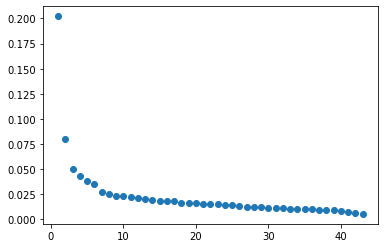

In [4]:
# Factor analysis to reduce the feature dimenson
from sklearn.decomposition import PCA
x = df.iloc[:,range(5,len(df.columns))]
pca = PCA(n_components=0.99, random_state = 1234)
pca.fit(x)

print(pca.explained_variance_ratio_)
plt.scatter(x = range(1, pca.n_components_+1),
            y = pca.explained_variance_ratio_, marker='o')
plt.show()

In [5]:
pca = PCA(n_components=10, random_state = 1234)
pca.fit(x)
r = round(sum(pca.explained_variance_ratio_)*100,0)
print(str(pca.n_components_) + " components explain " + str(r) + "% variance.")

x_pca = pca.fit_transform(x)
x_pca = pd.DataFrame(x_pca)
x_pca.columns = ['com_' + str(i) for i in range(1,pca.n_components_+1)]

10 components explain 55.0% variance.


## Step 2: Modeling

In [6]:
# Target variables
df1 = pd.DataFrame(df.iloc[:,range(0,5)])
y1 = df1.iloc[:,0]
y2 = df1.iloc[:,1]
y3 = df1.iloc[:,2]
y4 = df1.iloc[:,3]
y5 = df1.iloc[:,4]

In [7]:
def PR(true, pred, name, model_name):
    
    if name!='':
    
        precision, recall, thresholds = precision_recall_curve(true, pred) #PR
        pr_auc = auc(recall, precision)
        figure = plt.figure(figsize=(8, 6))
        plt.plot(recall,precision, color = 'blue')
        plt.title('{}: Precision/Recall Curve- {}'.format(name, model_name))
        plt.xlabel('Recall')
        plt.ylabel('Precision')
        plt.legend(loc="upper right", labels = ['Full model {}'.format(round(pr_auc, 2))])
    
    else:
        
        figure = plt.figure(figsize=(8, 6))
        

        c = []
        
        for i in range(5):
        
            precision, recall, thresholds = precision_recall_curve(true[i], pred[i]) #PR
            pr_auc = auc(recall, precision)
            c.append(pr_auc)
            
        
            plt.plot(recall,precision)
            
        plt.title('Precision/Recall Curve-{}'.format(model_name))
        plt.xlabel('Recall')
        plt.ylabel('Precision')    
        plt.legend(loc="upper right", labels = ['{} model {}'.format(cls[i], round(c[i], 2)) for i in range(5)])
    
    plt.savefig('{}.png'.format(time.time()),dpi=300)
        
        

def ROC(true, pred, name, model_name):
    
    if name!='':
    
        figure = plt.figure(figsize=(8, 6))
        fpr, tpr, thresholds = roc_curve(true, pred, pos_label=1) #roc
        plt.plot(fpr,tpr,marker = 'o')
        plt.title('{}: ROC Curve-{}'.format(name, model_name))
    
    else:
        
        figure = plt.figure(figsize=(8, 6))
        
        for i in range(5):
            fpr, tpr, thresholds = roc_curve(true[i], pred[i], pos_label=1) #roc
            plt.plot(fpr,tpr,marker = 'o')
        plt.title('ROC Curve-{}'.format(model_name))
        plt.legend(loc="upper right", labels = ['{}'.format(cls[i]) for i in range(5)])
        
    plt.savefig('{}.png'.format(time.time()),dpi=300)
            
        
        
def report(true, pred, name):
    print("confusion matrix: {}".format(name))
    print(confusion_matrix(true,pred))
    print("classification report: {}".format(name))
    print(classification_report(true, pred))
    print('accuracy score: {}'.format(name))
    print(accuracy_score(true, pred))
    print('auc score: {}'.format(name))
    print(roc_auc_score(true, pred))

In [8]:
# Function for ROC Cureve and AUC
def roc(response, score, label):
    from sklearn.metrics import roc_curve
    from sklearn.metrics import auc
    import matplotlib.pyplot as plt 
    fpr, tpr, thresholds = roc_curve(response, score.astype(float))
    #Calculate the AUC
    roc_auc = auc(fpr, tpr)
    #report(fpr,tpr,label)
    # Plot the ROC curve
    plt.plot(fpr, tpr,label= label)
    plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate or (1 - Specifity)')
    plt.ylabel('True Positive Rate or (Sensitivity)')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc = 0)
    return(roc_auc)

### 2-1 Linear Regression Model

Model 1 is the linear regression model, 5 models are trained on the data. The AUC values and ROC curve are shown below. These show us that __''Methylglyoxol(Pyruvate)''__ has the largest AUC, whose value is more than 0.875. The corresponding ROC curve is also closed to top left whose color is green.

***************************************
Everolimus(mTOR)
confusion matrix: Everolimus(mTOR)
[[2 3]
 [1 2]]
classification report: Everolimus(mTOR)
              precision    recall  f1-score   support

         0.0       0.67      0.40      0.50         5
         1.0       0.40      0.67      0.50         3

    accuracy                           0.50         8
   macro avg       0.53      0.53      0.50         8
weighted avg       0.57      0.50      0.50         8

accuracy score: Everolimus(mTOR)
0.5
auc score: Everolimus(mTOR)
0.5333333333333333
***************************************
Disulfiram(ALDH2)
confusion matrix: Disulfiram(ALDH2)
[[1 1]
 [2 4]]
classification report: Disulfiram(ALDH2)
              precision    recall  f1-score   support

         0.0       0.33      0.50      0.40         2
         1.0       0.80      0.67      0.73         6

    accuracy                           0.62         8
   macro avg       0.57      0.58      0.56         8
weighted avg       0

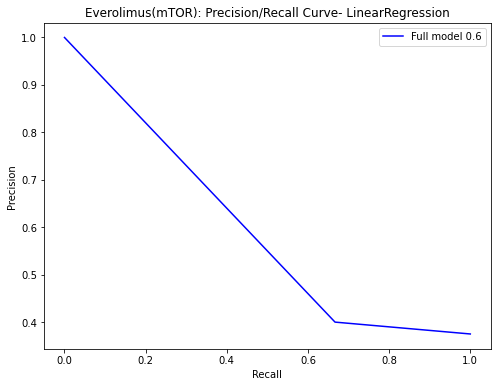

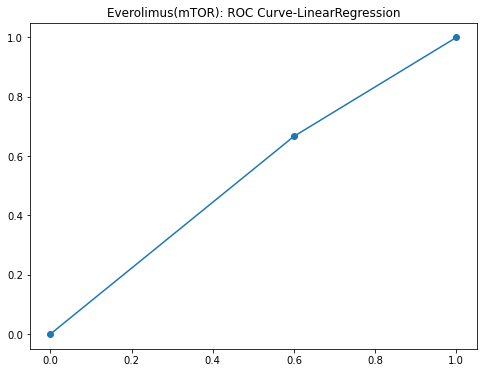

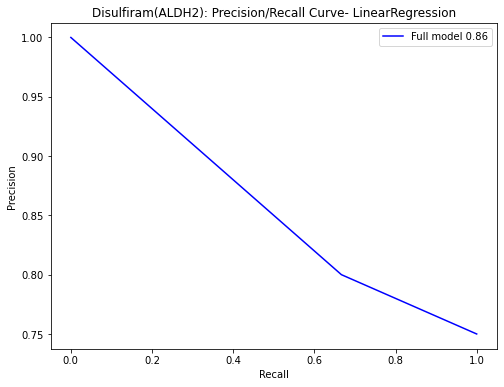

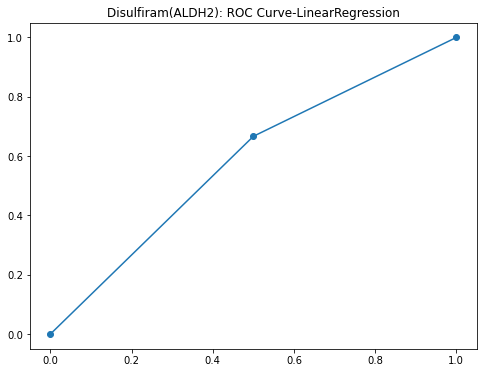

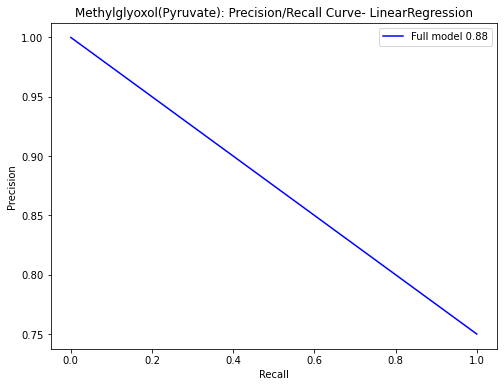

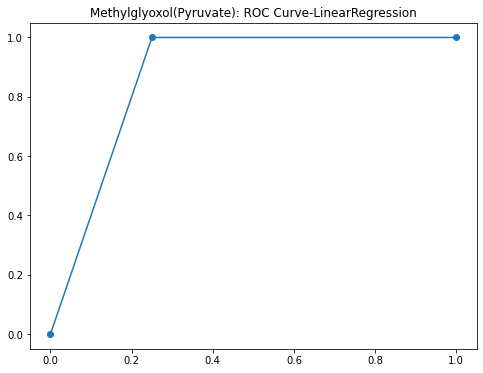

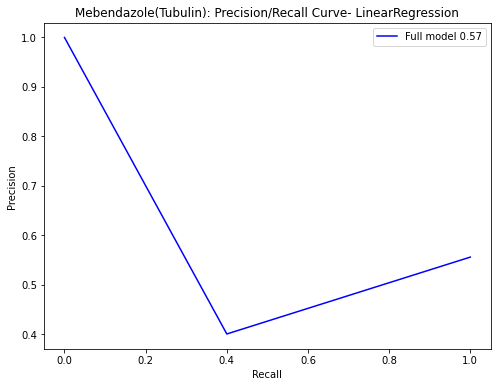

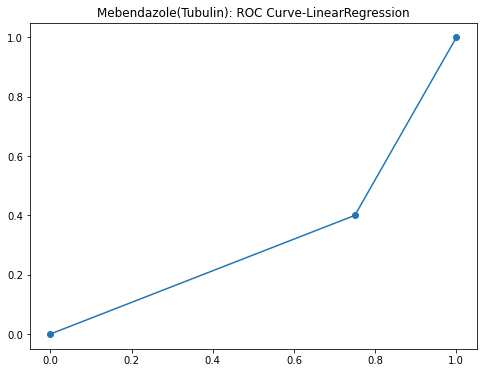

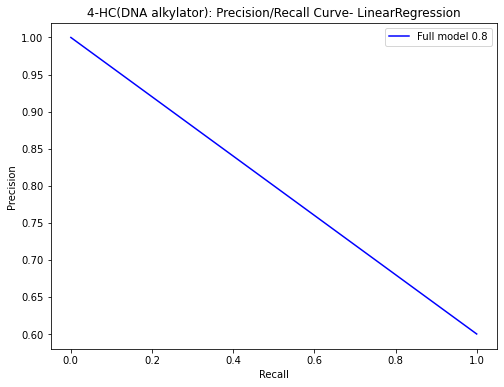

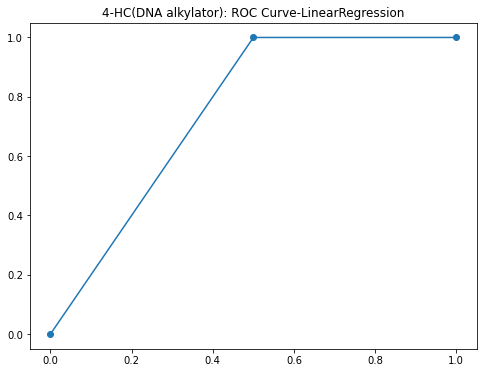

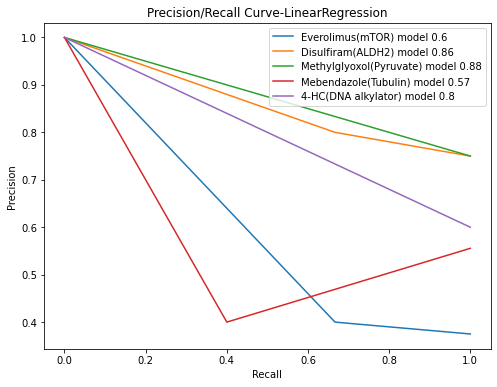

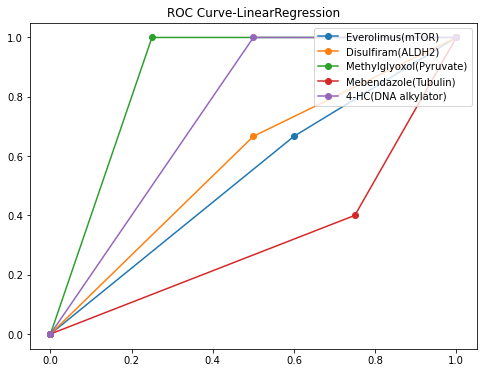

In [9]:
# set gridsearch parameter
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

tuned_parameters = []

Ytrue = []
Ypred = []
for i in range(5):
    
    print("*************"*3)
    print(cls[i])
    X_train = Train[i]
    X_test = Test[i]
    y_train = Ytrain[i]
    y_test = Ytest[i]
    
    # set model evaluation method
    score = 'neg_mean_squared_error'

    # construct GridSearch classifier to 5-fold
    lr = LinearRegression()
    clf = lr
    # do k-fold on training data, get optimal model parameter
    clf.fit(X_train, y_train)

    # test the generalization of the optimal model on the test set
    y_true, y_pred = y_test, clf.predict(X_test)
    y_pred = [1 if i>=0.5 else 0 for i in y_pred]  
    
    report(y_true, y_pred, cls[i]) #classification report

    PR(y_true, y_pred, cls[i], 'LinearRegression') #PR
    
    ROC(y_true, y_pred, cls[i], 'LinearRegression') #ROC
    
    Ytrue.append(y_true)
    Ypred.append(y_pred)


PR(Ytrue, Ypred, '', 'LinearRegression') #PR
    
ROC(Ytrue, Ypred, '', 'LinearRegression') #ROC
#print(confusion_matrix(y1,y1_pred_list))
#print(classification_report(y1,y1_pred_list))
#print(accuracy_score(y1,y1_pred_list))


### 2-2 Logistic Regression Model

Model 2 is the logistic regression model, 5 models are trained on the data The AUC values and ROC curve are shown below. These show us that __''Methylglyoxol(Pyruvate)''__ has the largest AUC, whose value is more than 0.875. The corresponding ROC curve is also closed to top left whose color is green.

***************************************
Everolimus(mTOR)
Best parameters set found on development set:
{'C': 0.5, 'max_iter': 100, 'penalty': 'l2'}
confusion matrix: Everolimus(mTOR)
[[2 3]
 [1 2]]
classification report: Everolimus(mTOR)
              precision    recall  f1-score   support

         0.0       0.67      0.40      0.50         5
         1.0       0.40      0.67      0.50         3

    accuracy                           0.50         8
   macro avg       0.53      0.53      0.50         8
weighted avg       0.57      0.50      0.50         8

accuracy score: Everolimus(mTOR)
0.5
auc score: Everolimus(mTOR)
0.5333333333333333
***************************************
Disulfiram(ALDH2)
Best parameters set found on development set:
{'C': 1, 'max_iter': 100, 'penalty': 'l2'}
confusion matrix: Disulfiram(ALDH2)
[[1 1]
 [2 4]]
classification report: Disulfiram(ALDH2)
              precision    recall  f1-score   support

         0.0       0.33      0.50      0.40         2
   

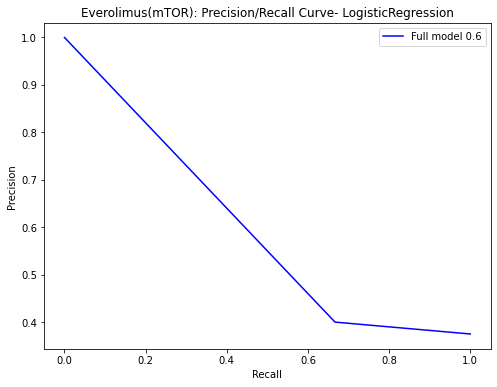

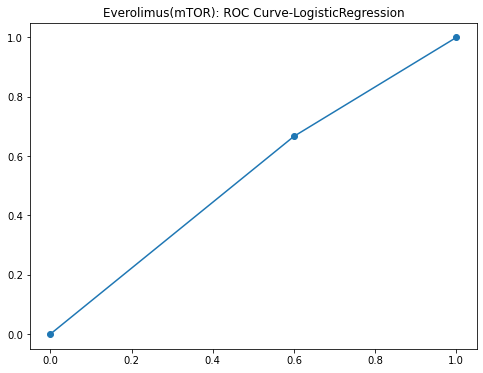

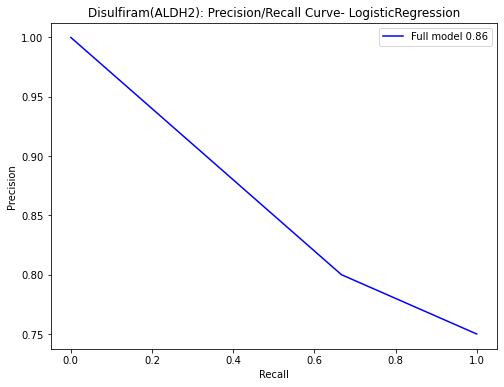

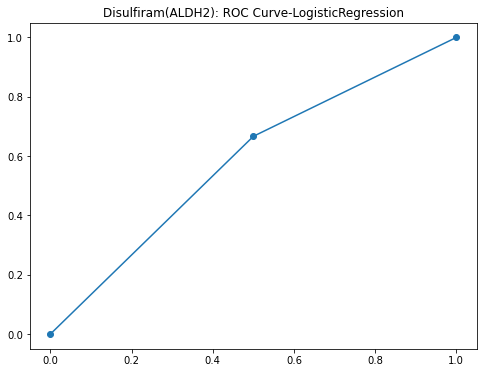

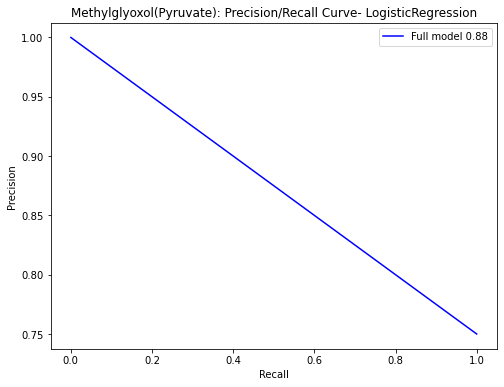

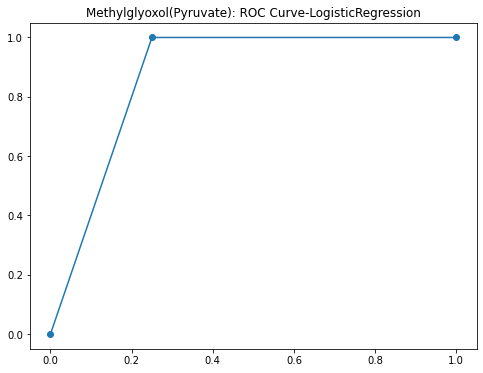

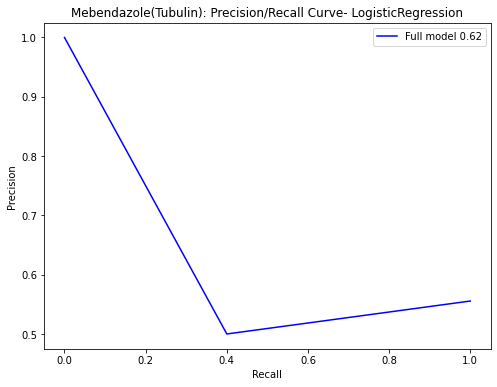

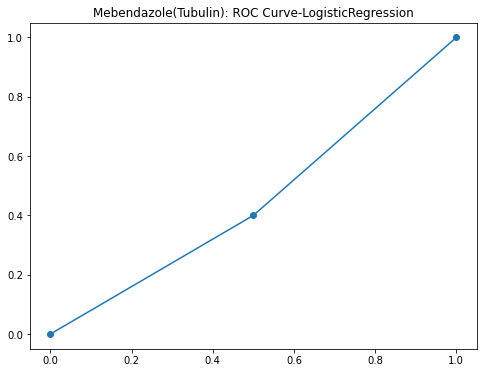

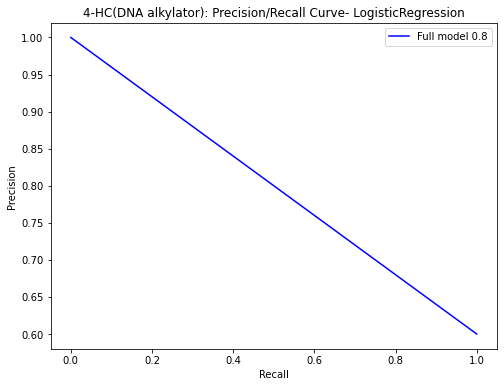

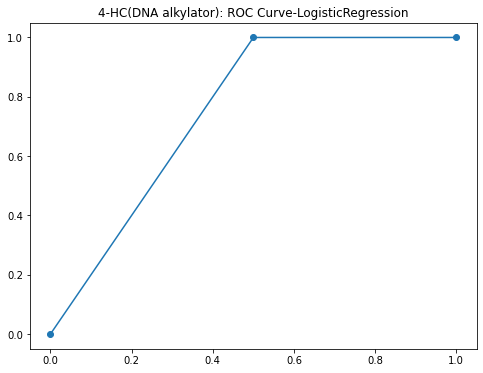

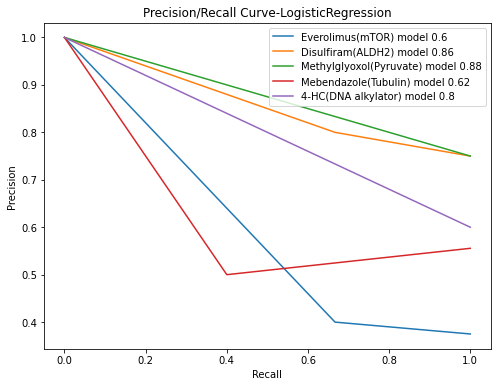

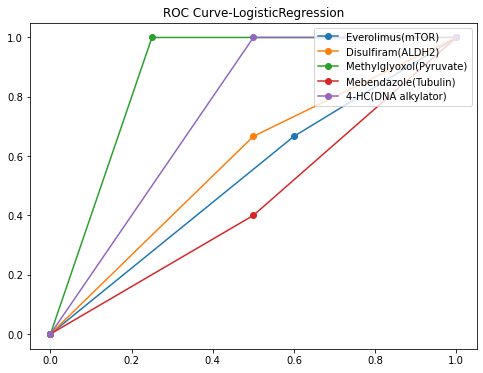

In [10]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

tuned_parameters = [{'penalty': ['l1', 'l2', 'elasticnet'], 'C': [0.5, 1, 1.5],
                     'max_iter': [100, 300, 500]}]

Ytrue = []
Ypred = []
for i in range(5):
    
    print("*************"*3)
    print(cls[i])
    X_train = Train[i]
    X_test = Test[i]
    y_train = Ytrain[i]
    y_test = Ytest[i]
    
    score = 'precision'

    clf = GridSearchCV( LogisticRegression(), tuned_parameters, cv=5,
                       scoring='%s_weighted' % score)
    
    # do k-fold on training data, get optimal model parameter
    clf.fit(X_train, y_train)
    
    print("Best parameters set found on development set:")
    print(clf.best_params_)

    # test the generalization of the optimal model on the test set
    y_true, y_pred = y_test, clf.predict(X_test)
    y_pred = [1 if i>=0.5 else 0 for i in y_pred]  
    
    report(y_true, y_pred, cls[i]) #classification report

    PR(y_true, y_pred, cls[i], 'LogisticRegression') #PR
    
    ROC(y_true, y_pred, cls[i], 'LogisticRegression') #ROC
    
    Ytrue.append(y_true)
    Ypred.append(y_pred)


PR(Ytrue, Ypred, '', 'LogisticRegression') #PR
    
ROC(Ytrue, Ypred, '', 'LogisticRegression') #ROC

### 2-3 LASSO Model

Model 3 is the LASSO model, which is based on the traditional logistic model with L1 regularization. The L1 regularization adds a penalty equivalent to the absolute magnitude of regression coefficients and tries to minimize them, which allows some coefficients to be exactly zero. Thus, LASSO model performs feature selection and returns a final model with lower number of parameters.

1 parameter is contained in the model, so cross validation will be used to select the better value. In our analysis 10 folds CV will be used in all CVs. There are 6 pair of figures, first 5 are the CV result for parameters for each target, and the 6th one the overall result for all targets.

5 models are trained on the data，the AUC values and ROC curve are also shown below. These show us that __''Methylglyoxol(Pyruvate)''__ has the largest AUC, whose value is more than 0.75. The corresponding ROC curve(bottom left) is also closed to top left whose color is green. 

Differnt target has different best parameter, which is shown blow:
  
  1) Everolimus(mTOR): {'alpha': 0.1, 'max_iter': 100, 'normalize': True}
  
  2) Disulfiram(ALDH2): {'alpha': 0.1, 'max_iter': 100, 'normalize': False}
  
  3) Methylglyoxol(Pyruvate): {'alpha': 0.1, 'max_iter': 500, 'normalize': False}
  
  4) Mebendazole(Tubulin): {'alpha': 0.1, 'max_iter': 100, 'normalize': True}
  
  5) 4-HC(DNA alkylator): {'alpha': 0.1, 'max_iter': 100, 'normalize': True}

***************************************
Everolimus(mTOR)
Best parameters set found on development set:
{'alpha': 0.1, 'max_iter': 100, 'normalize': True}
confusion matrix: Everolimus(mTOR)
[[0 5]
 [0 3]]
classification report: Everolimus(mTOR)
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         5
         1.0       0.38      1.00      0.55         3

    accuracy                           0.38         8
   macro avg       0.19      0.50      0.27         8
weighted avg       0.14      0.38      0.20         8

accuracy score: Everolimus(mTOR)
0.375
auc score: Everolimus(mTOR)
0.5
***************************************
Disulfiram(ALDH2)
Best parameters set found on development set:
{'alpha': 0.1, 'max_iter': 100, 'normalize': False}
confusion matrix: Disulfiram(ALDH2)
[[1 1]
 [2 4]]
classification report: Disulfiram(ALDH2)
              precision    recall  f1-score   support

         0.0       0.33      0.50      0.40         2
 

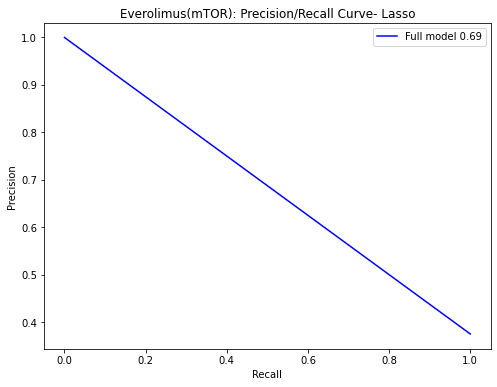

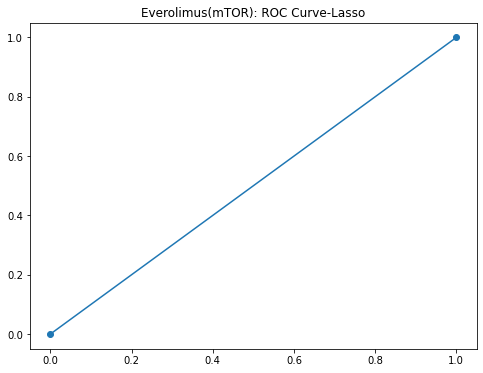

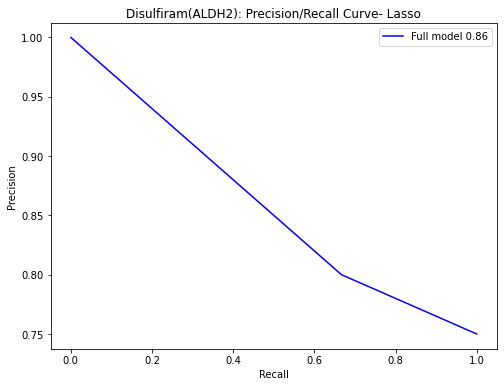

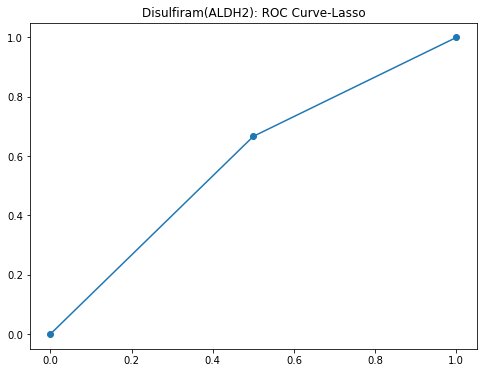

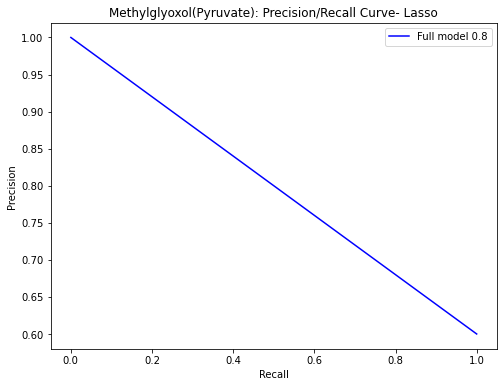

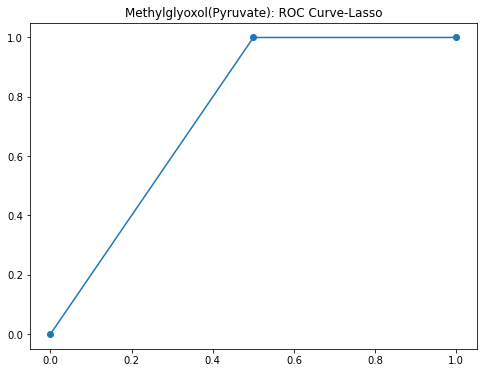

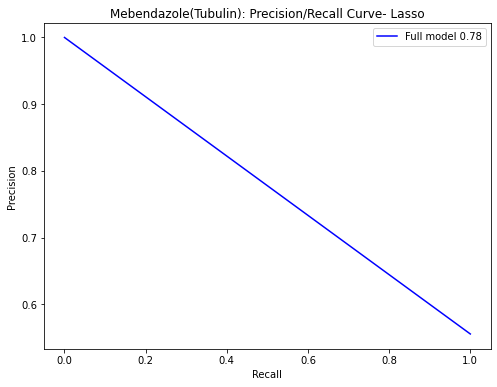

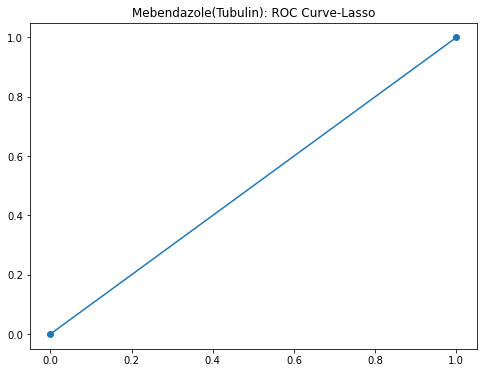

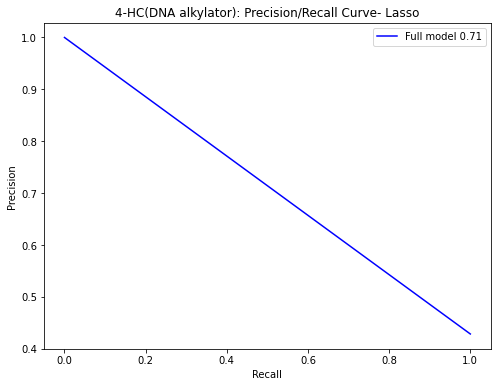

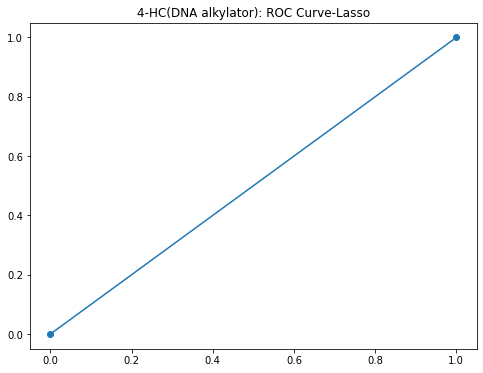

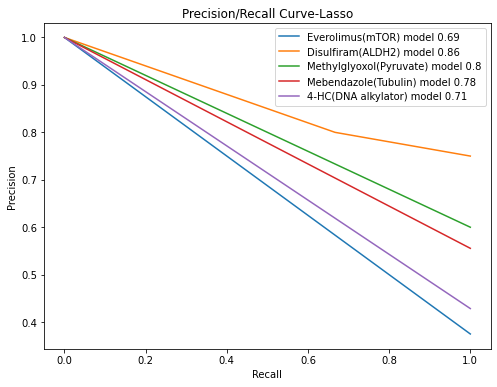

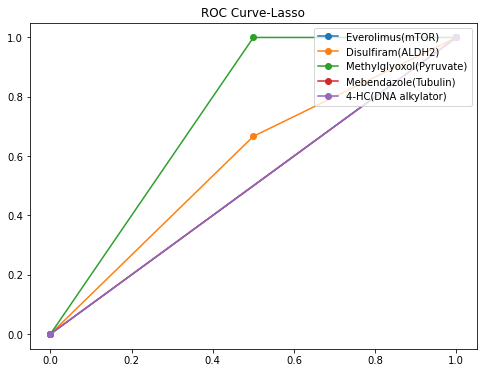

In [11]:
# Lasso
from sklearn.linear_model import Lasso

tuned_parameters = [{'alpha': [0.1, 1, 10], 'normalize': [True, False],
                     'max_iter': [100, 500, 1000]}]

Ytrue = []
Ypred = []
for i in range(5):
    
    print("*************"*3)
    print(cls[i])
    X_train = Train[i]
    X_test = Test[i]
    y_train = Ytrain[i]
    y_test = Ytest[i]
    
    score = 'neg_mean_squared_error'

    clf = GridSearchCV(Lasso(), tuned_parameters, cv=5,
                       scoring=score)
    
    # do k-fold on training data, get optimal model parameter
    clf.fit(X_train, y_train)
    
    print("Best parameters set found on development set:")
    print(clf.best_params_)

    # test the generalization of the optimal model on the test set
    y_true, y_pred = y_test, clf.predict(X_test)
    y_pred = [1 if i>=0.5 else 0 for i in y_pred]  
    
    report(y_true, y_pred, cls[i]) #classification report

    PR(y_true, y_pred, cls[i], 'Lasso') #PR
    
    ROC(y_true, y_pred, cls[i], 'Lasso') #ROC
    
    Ytrue.append(y_true)
    Ypred.append(y_pred)


PR(Ytrue, Ypred, '', 'Lasso') #PR
    
ROC(Ytrue, Ypred, '', 'Lasso') #ROC

### 2-4 ElasticNet Model

Model 4 is about the ElasticNet model. Elastic net uses the penalties from both the lasso and ridge techniques to regularize regression models. The technique combines both the lasso and ridge regression methods by learning from their shortcomings to improve on the regularization of statistical models. It has 4 parameters called __''alpha''__, __''normalize''__, __''l1_ratio''__ and __''max_iter''__. Cross validation is also be used. The same with LASSO result, 6 pairs of figures are also be plotted. 

The 6th figure is the ROC cureve of all 5 targets. It show us that __''Methylglyoxol(Pyruvate)''__ has the largest AUC, whose value is 0.875, whose color is green.

The best parameters combination in each target are also different, Details are shown below,

  1) Everolimus(mTOR): {'alpha': 0.1, 'l1_ratio': 0, 'max_iter': 1000, 'normalize': False}
  
  2) Disulfiram(ALDH2): {'alpha': 0.1, 'l1_ratio': 0.3, 'max_iter': 100, 'normalize': True}
  
  3) Methylglyoxol(Pyruvate): {'alpha': 1, 'l1_ratio': 0.3, 'max_iter': 100, 'normalize': False}
  
  4) Mebendazole(Tubulin): {'alpha': 1, 'l1_ratio': 0, 'max_iter': 100, 'normalize': False}
  
  5) 4-HC(DNA alkylator): {'alpha': 0.1, 'l1_ratio': 1, 'max_iter': 100, 'normalize': True}
 

***************************************
Everolimus(mTOR)
Best parameters set found on development set:
{'alpha': 0.1, 'l1_ratio': 0, 'max_iter': 1000, 'normalize': False}
confusion matrix: Everolimus(mTOR)
[[2 3]
 [1 2]]
classification report: Everolimus(mTOR)
              precision    recall  f1-score   support

         0.0       0.67      0.40      0.50         5
         1.0       0.40      0.67      0.50         3

    accuracy                           0.50         8
   macro avg       0.53      0.53      0.50         8
weighted avg       0.57      0.50      0.50         8

accuracy score: Everolimus(mTOR)
0.5
auc score: Everolimus(mTOR)
0.5333333333333333
***************************************
Disulfiram(ALDH2)
Best parameters set found on development set:
{'alpha': 0.1, 'l1_ratio': 0.3, 'max_iter': 100, 'normalize': True}
confusion matrix: Disulfiram(ALDH2)
[[1 1]
 [3 3]]
classification report: Disulfiram(ALDH2)
              precision    recall  f1-score   support

         

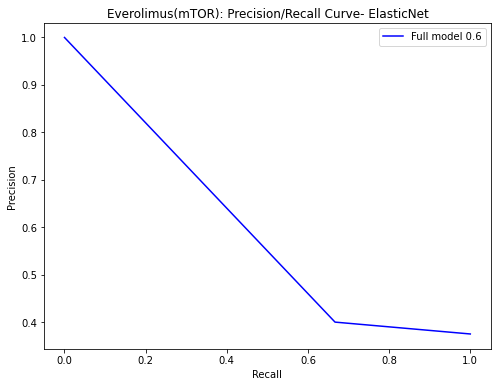

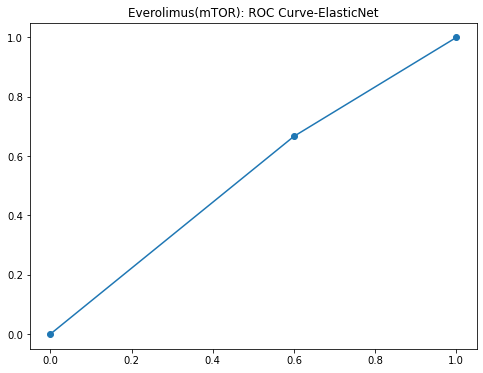

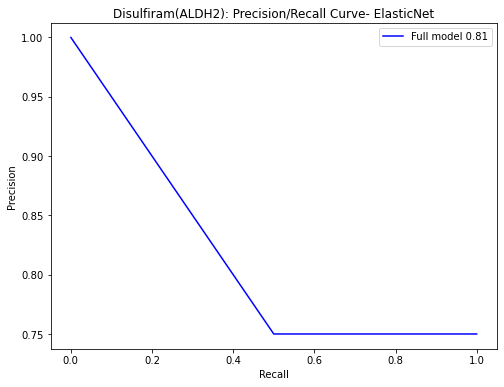

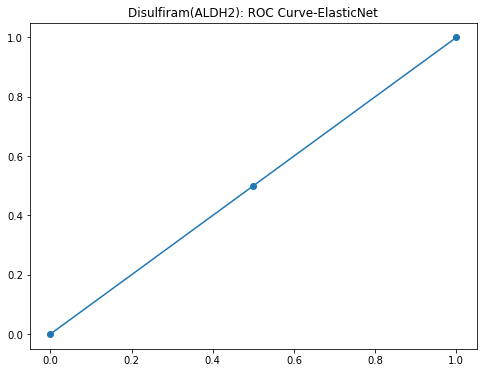

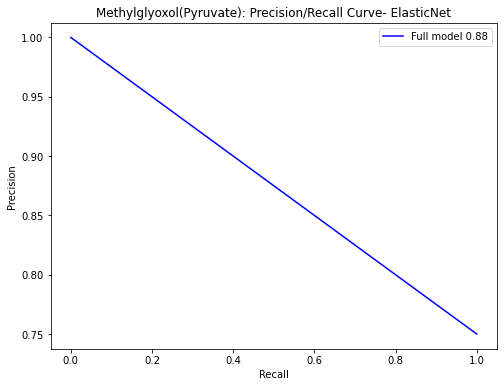

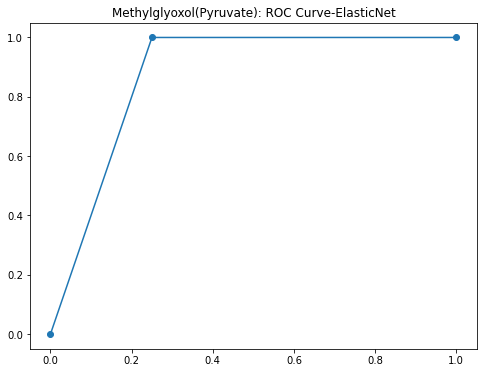

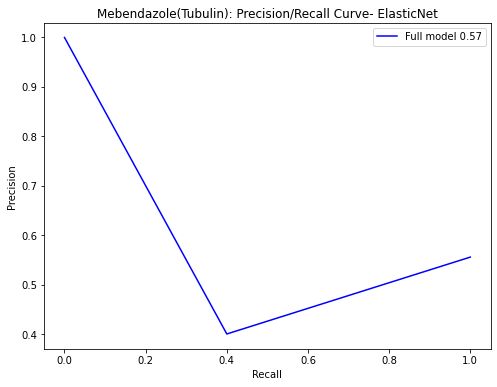

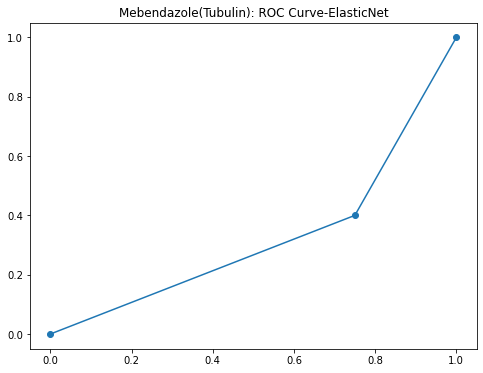

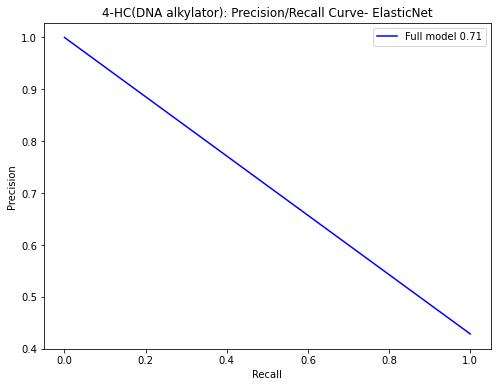

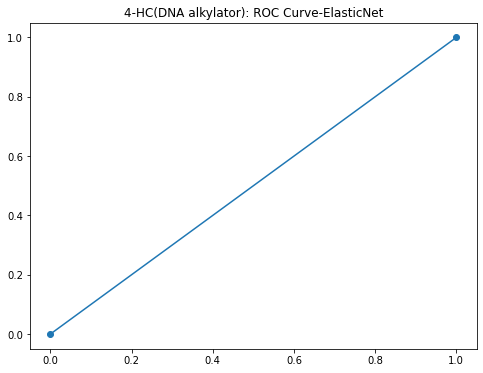

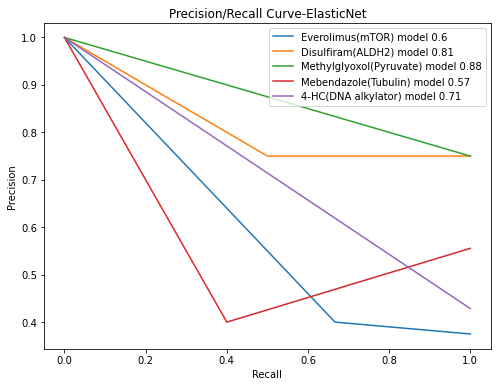

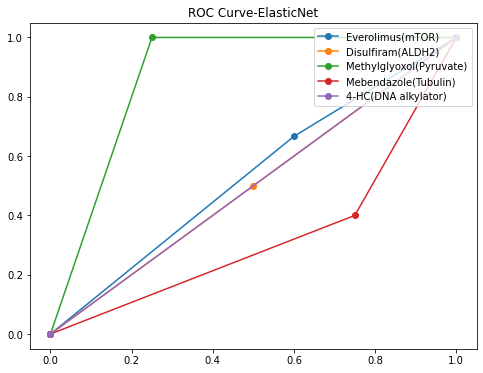

In [12]:
# Elastic Net
from sklearn.linear_model import ElasticNet

tuned_parameters = [{'alpha': [0.1, 1, 10], 'normalize': [True, False], 'l1_ratio':[0, 0.3, 0.5, 0.8, 1],
                     'max_iter': [100, 500, 1000]}]

Ytrue = []
Ypred = []
for i in range(5):
    
    print("*************"*3)
    print(cls[i])
    X_train = Train[i]
    X_test = Test[i]
    y_train = Ytrain[i]
    y_test = Ytest[i]
    
    score = 'neg_mean_squared_error'

    clf = GridSearchCV(ElasticNet(), tuned_parameters, cv=5,
                       scoring=score)
    
    # do k-fold on training data, get optimal model parameter
    clf.fit(X_train, y_train)
    
    print("Best parameters set found on development set:")
    print(clf.best_params_)

    # test the generalization of the optimal model on the test set
    y_true, y_pred = y_test, clf.predict(X_test)
    y_pred = [1 if i>=0.5 else 0 for i in y_pred]  
    
    report(y_true, y_pred, cls[i]) #classification report

    PR(y_true, y_pred, cls[i], 'ElasticNet') #PR
    
    ROC(y_true, y_pred, cls[i], 'ElasticNet') #ROC
    
    Ytrue.append(y_true)
    Ypred.append(y_pred)


PR(Ytrue, Ypred, '', 'ElasticNet') #PR
    
ROC(Ytrue, Ypred, '', 'ElasticNet') #ROC


### 2-5 Ridge Model

Model 5 is about the ridge regression. It is similar with LASSO model, the only difference is that Ridge uses L2 regularization and LASSO uses L1 regularization and all coefficients won't be exactly zero, they will be close to zero but will never be zero. The function in ElasticNet model can also be used with l1 ratio is always 0.

The model result also show us that __''Methylglyoxol(Pyruvate)''__ has the largest AUC, whose value is 0.875, whose color is green.

The best parameters combination in each target are also different, Details are shown below,

  1) Everolimus(mTOR): {'alpha': 0.1, 'max_iter': 100, 'normalize': True}
  
  2) Disulfiram(ALDH2): {'alpha': 0.1, 'max_iter': 100, 'normalize': False}
  
  3) Methylglyoxol(Pyruvate): {'alpha': 0.1, 'max_iter': 100, 'normalize': False}
  
  4) Mebendazole(Tubulin): {'alpha': 0.1, 'max_iter': 100, 'normalize': False}
  
  5) 4-HC(DNA alkylator): {'alpha': 0.1, 'max_iter': 100, 'normalize': False}

***************************************
Everolimus(mTOR)
Best parameters set found on development set:
{'alpha': 0.1, 'max_iter': 100, 'normalize': True}
confusion matrix: Everolimus(mTOR)
[[2 3]
 [1 2]]
classification report: Everolimus(mTOR)
              precision    recall  f1-score   support

         0.0       0.67      0.40      0.50         5
         1.0       0.40      0.67      0.50         3

    accuracy                           0.50         8
   macro avg       0.53      0.53      0.50         8
weighted avg       0.57      0.50      0.50         8

accuracy score: Everolimus(mTOR)
0.5
auc score: Everolimus(mTOR)
0.5333333333333333
***************************************
Disulfiram(ALDH2)
Best parameters set found on development set:
{'alpha': 0.1, 'max_iter': 100, 'normalize': False}
confusion matrix: Disulfiram(ALDH2)
[[1 1]
 [2 4]]
classification report: Disulfiram(ALDH2)
              precision    recall  f1-score   support

         0.0       0.33      0.50      0.4

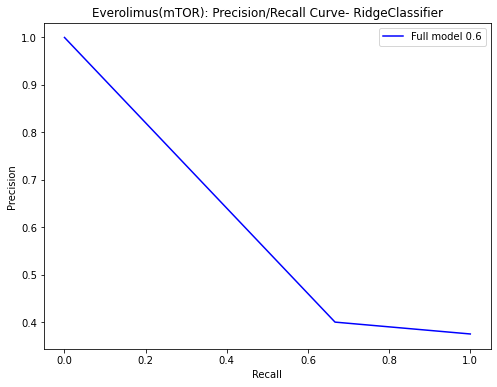

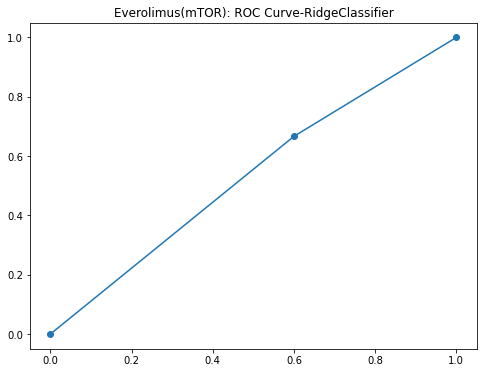

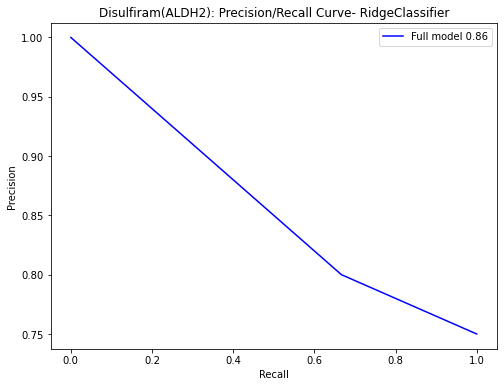

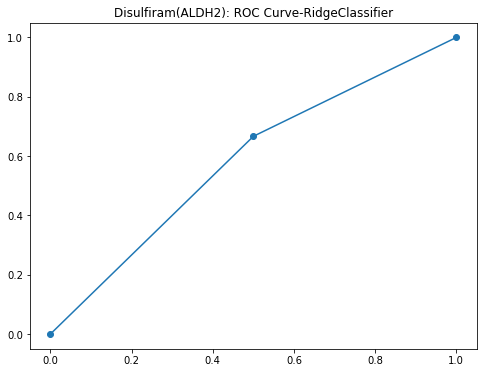

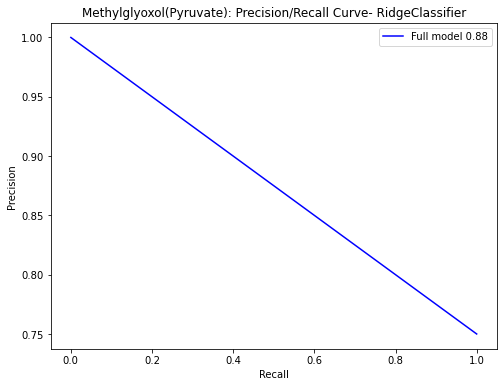

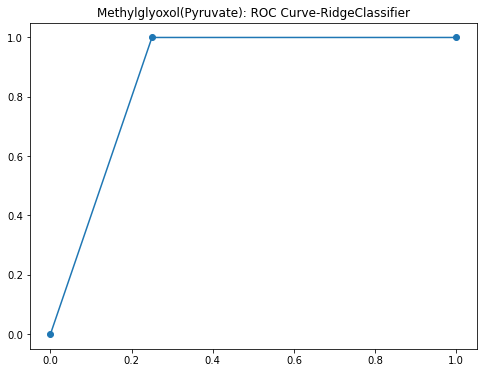

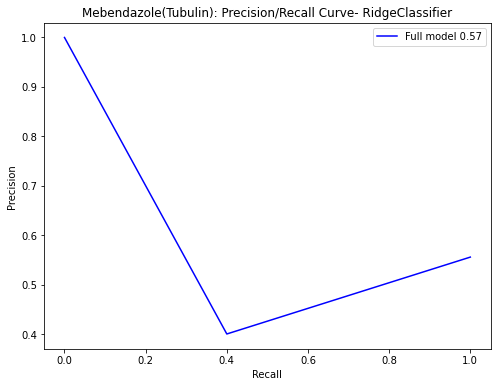

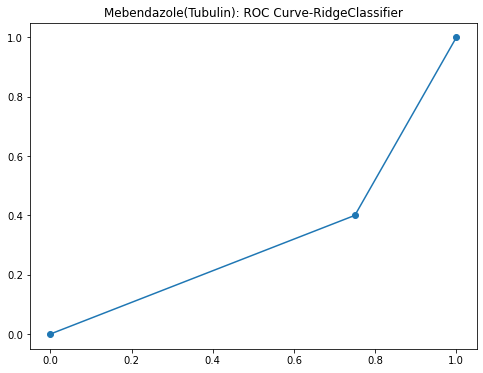

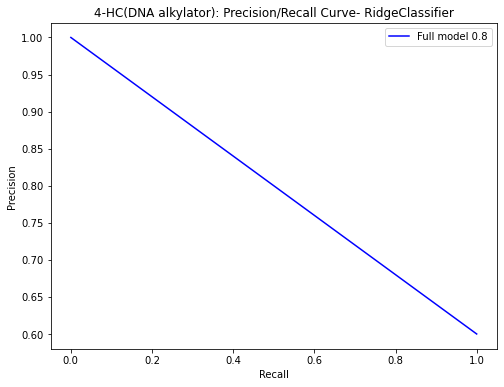

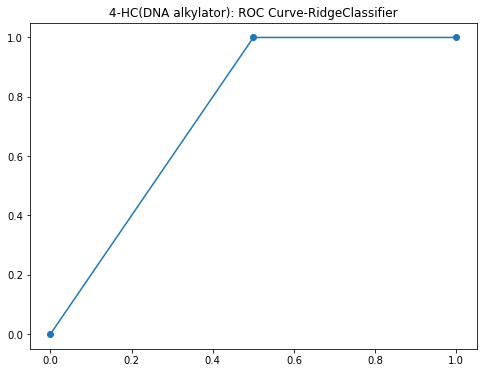

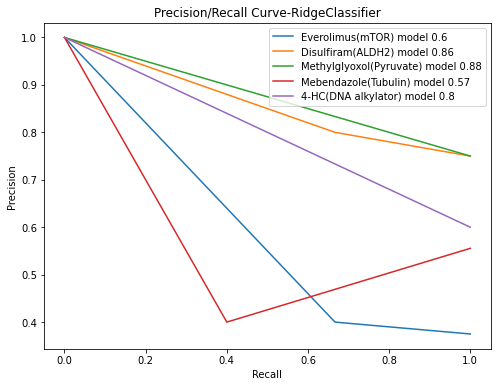

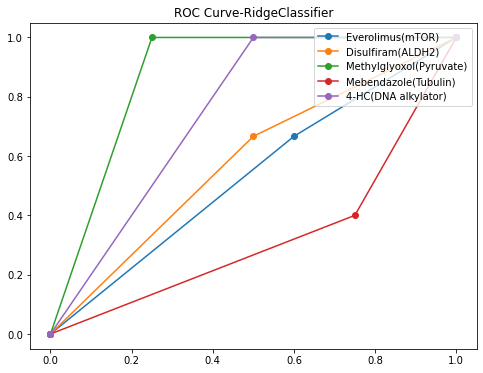

In [13]:
# Ridge-2
# RidgeClassifier
from sklearn.linear_model import RidgeClassifier

tuned_parameters = [{'alpha': [0.1, 1, 10], 'normalize': [True, False],
                     'max_iter': [100, 500, 1000]}]

Ytrue = []
Ypred = []
for i in range(5):
    
    print("*************"*3)
    print(cls[i])
    X_train = Train[i]
    X_test = Test[i]
    y_train = Ytrain[i]
    y_test = Ytest[i]
    
    score = 'precision'

    clf = GridSearchCV( RidgeClassifier(), tuned_parameters, cv=5,
                       scoring='%s_weighted' % score)
    
    # do k-fold on training data, get optimal model parameter
    clf.fit(X_train, y_train)
    
    print("Best parameters set found on development set:")
    print(clf.best_params_)

    # test the generalization of the optimal model on the test set
    y_true, y_pred = y_test, clf.predict(X_test)
    y_pred = [1 if i>=0.5 else 0 for i in y_pred]  
    
    report(y_true, y_pred, cls[i]) #classification report

    PR(y_true, y_pred, cls[i], 'RidgeClassifier') #PR
    
    ROC(y_true, y_pred, cls[i], 'RidgeClassifier') #ROC
    
    Ytrue.append(y_true)
    Ypred.append(y_pred)


PR(Ytrue, Ypred, '', 'RidgeClassifier') #PR
    
ROC(Ytrue, Ypred, '', 'RidgeClassifier') #ROC

## Step 3: Conclusion

The data is high dimension data, which has more than 18,000 features, so dimension reduction should be done first, in our analysis, PCA method is used to select 10 main components, which can explain 55% of the original variance. models will be trained using these 10 new components.

5 Models are train on the data, which are Linear, Logistic, Lasso, Elastic Net and Ridge. All of them show us that __''Methylglyoxol(Pyruvate)''__  is the best one.